# Capstone Project - The Battle of Neighbourhoods

#### Table of contents:<br>
● Introduction/Business Problem<br>
● Data<br>
● Methodology<br>
● Analysis<br>
● Results and Discussion<br>
● Conclusion<br>

## 1. Introduction
### 1.1 Background
The average American moves about eleven times in their lifetime. This brings us to the question: Do people move until they find a place to settle down where they truly feel happy, or do our wants and needs change over time, prompting us to eventually leave a town we once called home for a new area that will bring us satisfaction? Or, do we too often move to a new area without knowing exactly what we’re getting into, forcing us to turn tail and run at the first sign of discomfort? To minimize the chances of this happening, we should always do proper research when planning our next move in life. Consider the following factors when picking a new place to live so you don’t end up wasting your valuable time and money making a move you’ll end up regretting. Safety is a top concern when moving to a new area. If you don’t feel safe in your own home, you’re not going to be able to enjoy living there.

### 1.2 Problem
The crime statistics dataset of New York city found on Kaggle has crimes in each Boroughs of New York city from 2001 to 2015. The year 2015 being the latest we will be considering the data of that year which is actually old information as of now. The crime rates in each borough may have changed over time. This project aims to select the safest borough in New York city based on the total crimes, explore the neighborhoods of that borough to find the 10 most common venues in each neighbourhood and finally cluster the neighbourhoods using k-mean clustering.

### 1.3 Target Audience
Expats who are considering to relocate to New York city will be interested to identify the safest borough in New York city and explore its neighborhoods and common venues around each neighborhood. Most people like international students who could relocate to New York city for thier education, career aspects etc. would get benefitted because they might not know anything about the neighbourhood before they move in.

## 2. Data 
Based on definition of our problem, factors that will influence our decision are:

The total number of crimes committed in each of the borough during the year 2015.
The most common venues in each of the neighbourhood in the safest borough selected.
Following data sources will be needed to extract/generate the required information:

● Part 1: Preprocessing a real world data set from Kaggle showing the New York City Crimes from 2001 to 2015: A dataset consisting of the crime complaints of each borough in New York City obtained from Kaggle.<br>
● Part 2: Scraping additional information of the different Boroughs in New York City from a Wikipedia page.: More information regarding the boroughs of London is scraped using the Beautifulsoup library.<br>
● Part 3: Creating a new dataset of the Neighbourhoods of the safest borough in New York City and generating their co-ordinates.: Co-ordinate of neighbourhood will be obtained using Python Geocoder.

#### Part 1: Preprocessing a real world data set from Kaggle showing the New York City Crimes from 2001 to 2015
##### London Crime Data
About this file

● CMPLNT_NUM: Randomly generated persistent ID for each complaint.<br>
● BORO_NM: The name of the borough in which the incident occurred.<br>
● OFNS_DESC: Description of offense corresponding with key code.<br>
● KY_CD: Three digit offense classification code.<br>
● LAW_CAT_CD: Level of offense: felony, misdemeanor, violation.<br>
● LOC_OF_OCCUR_DESC: Specific location of occurrence in or around the premises; inside, opposite of, front of, rear of <br>
● RPT_DT: Date event was reported to police.<br>
● Latitude: Latitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326).<br>
● Longitude: Longitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326).<br>
Data set URL: https://www.kaggle.com/adamschroeder/crimes-new-york-city/data?select=NYPD_Complaint_Data_Historic.csv

#### Import necessary libraries.

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
!conda install -c anaconda beautifulsoup4 --yes
from bs4 import BeautifulSoup # library for web scrapping  

!conda install -c conda-forge geocoder --yes
import geocoder

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - beautifulsoup4


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    beautifulsoup4-4.8.2       |           py36_0         161 KB  anaconda
    ca-certificates-2020.1.1   |                0         132 KB  anaconda
    certifi-2020.4.5.1         |           py36_0         159 KB  anaconda
    openssl-1.1.1g             |       h7b6447c_0         3.8 MB  anaconda
    soupsieve-2.0.1            |             py_0          33 KB  anaconda
    ------------------------------------------------------------
                                           Total:         4.3 MB

The following NEW packages will be INSTALLED:

  beautifulsoup4     anaconda/linux-64::beautifulsoup4-4.8.2-py36_0
  soupsieve          anaconda/noarch::soupsieve-2.0.1-py_0

The following packag

Load the data set into Notebook

In [2]:
import pandas as pd
NYPD_CompData = pd.read_csv(r"NYPD_Complaint_Data_Historic.csv")
NYPD_CompData

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,101109527,12/31/2015,23:45:00,NaN,NaN,12/31/2015,113,FORGERY,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",...,44.0,INSIDE,BAR/NIGHT CLUB,NaN,NaN,1007314.0,241257.0,40.828848,-73.916661,"(40.828848333, -73.916661142)"
1,153401121,12/31/2015,23:36:00,NaN,NaN,12/31/2015,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,...,103.0,OUTSIDE,NaN,NaN,NaN,1043991.0,193406.0,40.697338,-73.784557,"(40.697338138, -73.784556739)"
2,569369778,12/31/2015,23:30:00,NaN,NaN,12/31/2015,117,DANGEROUS DRUGS,503.0,"CONTROLLED SUBSTANCE,INTENT TO",...,28.0,NaN,OTHER,NaN,NaN,999463.0,231690.0,40.802607,-73.945052,"(40.802606608, -73.945051911)"
3,968417082,12/31/2015,23:30:00,NaN,NaN,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,105.0,INSIDE,RESIDENCE-HOUSE,NaN,NaN,1060183.0,177862.0,40.654549,-73.726339,"(40.654549444, -73.726338791)"
4,641637920,12/31/2015,23:25:00,12/31/2015,23:30:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,13.0,FRONT OF,OTHER,NaN,NaN,987606.0,208148.0,40.738002,-73.987891,"(40.7380024, -73.98789129)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,317154175,11/1/2013,20:30:00,11/1/2013,21:00:00,11/1/2013,341,PETIT LARCENY,338.0,"LARCENY,PETIT FROM BUILDING,UN",...,40.0,INSIDE,RESIDENCE - APT. HOUSE,NaN,NaN,1006185.0,233271.0,40.806932,-73.920767,"(40.806931888, -73.920766811)"
1048571,833410354,11/1/2013,20:28:00,11/1/2013,20:31:00,11/1/2013,344,ASSAULT 3 & RELATED OFFENSES,113.0,"MENACING,UNCLASSIFIED",...,75.0,FRONT OF,GROCERY/BODEGA,NaN,NaN,1013319.0,180075.0,40.660901,-73.895227,"(40.660901484, -73.895226891)"
1048572,961949188,11/1/2013,20:25:00,NaN,NaN,11/1/2013,121,CRIMINAL MISCHIEF & RELATED OF,269.0,"MISCHIEF,CRIMINAL, UNCL 2ND",...,1.0,INSIDE,FAST FOOD,NaN,NaN,982953.0,203013.0,40.723909,-74.004681,"(40.723908621, -74.004680695)"
1048573,157608118,11/1/2013,20:25:00,11/1/2013,20:45:00,11/1/2013,235,DANGEROUS DRUGS,511.0,"CONTROLLED SUBSTANCE, POSSESSI",...,52.0,FRONT OF,STREET,NaN,NaN,1019388.0,259017.0,40.877554,-73.872939,"(40.877554428, -73.872939471)"


Removing all the unnecessary columns and storing it in 'df_data' variable.

In [3]:
df_data=NYPD_CompData[['CMPLNT_NUM','BORO_NM','OFNS_DESC','LOC_OF_OCCUR_DESC','KY_CD','LAW_CAT_CD','Latitude','Longitude','RPT_DT']]
df_data.head()

,CMPLNT_NUM,BORO_NM,OFNS_DESC,LOC_OF_OCCUR_DESC,KY_CD,LAW_CAT_CD,Latitude,Longitude,RPT_DT
0,101109527,BRONX,FORGERY,INSIDE,113,FELONY,40.828848,-73.916661,12/31/2015
1,153401121,QUEENS,MURDER & NON-NEGL. MANSLAUGHTER,OUTSIDE,101,FELONY,40.697338,-73.784557,12/31/2015
2,569369778,MANHATTAN,DANGEROUS DRUGS,NaN,117,FELONY,40.802607,-73.945052,12/31/2015
3,968417082,QUEENS,ASSAULT 3 & RELATED OFFENSES,INSIDE,344,MISDEMEANOR,40.654549,-73.726339,12/31/2015
4,641637920,MANHATTAN,ASSAULT 3 & RELATED OFFENSES,FRONT OF,344,MISDEMEANOR,40.738002,-73.987891,12/31/2015


Separating the Year of Report registered into a separate column 'Year'.

In [4]:
df_data['RPT_DT'] = pd.to_datetime(df_data['RPT_DT'], format='%m/%d/%Y', errors = 'coerce')
df_data['Year'] = pd.DatetimeIndex(df_data['RPT_DT']).year
df_data.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,CMPLNT_NUM,BORO_NM,OFNS_DESC,LOC_OF_OCCUR_DESC,KY_CD,LAW_CAT_CD,Latitude,Longitude,RPT_DT,Year
0,101109527,BRONX,FORGERY,INSIDE,113,FELONY,40.828848,-73.916661,2015-12-31,2015
1,153401121,QUEENS,MURDER & NON-NEGL. MANSLAUGHTER,OUTSIDE,101,FELONY,40.697338,-73.784557,2015-12-31,2015
2,569369778,MANHATTAN,DANGEROUS DRUGS,NaN,117,FELONY,40.802607,-73.945052,2015-12-31,2015
3,968417082,QUEENS,ASSAULT 3 & RELATED OFFENSES,INSIDE,344,MISDEMEANOR,40.654549,-73.726339,2015-12-31,2015
4,641637920,MANHATTAN,ASSAULT 3 & RELATED OFFENSES,FRONT OF,344,MISDEMEANOR,40.738002,-73.987891,2015-12-31,2015


Let us know the datatype of column Year 

In [5]:
df_data['Year'].dtype

dtype('int64')

As it is of int type, Converting it as str type 

In [6]:
df_data['Year']=df_data['Year'].astype(str)
df_data['Year'].dtype

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


dtype('O')

Now, lets look at the dataset.

In [7]:
df_data.head()

,CMPLNT_NUM,BORO_NM,OFNS_DESC,LOC_OF_OCCUR_DESC,KY_CD,LAW_CAT_CD,Latitude,Longitude,RPT_DT,Year
0,101109527,BRONX,FORGERY,INSIDE,113,FELONY,40.828848,-73.916661,2015-12-31,2015
1,153401121,QUEENS,MURDER & NON-NEGL. MANSLAUGHTER,OUTSIDE,101,FELONY,40.697338,-73.784557,2015-12-31,2015
2,569369778,MANHATTAN,DANGEROUS DRUGS,NaN,117,FELONY,40.802607,-73.945052,2015-12-31,2015
3,968417082,QUEENS,ASSAULT 3 & RELATED OFFENSES,INSIDE,344,MISDEMEANOR,40.654549,-73.726339,2015-12-31,2015
4,641637920,MANHATTAN,ASSAULT 3 & RELATED OFFENSES,FRONT OF,344,MISDEMEANOR,40.738002,-73.987891,2015-12-31,2015


Accessing the dataframe with Year 2015 as it wass lastest of all other crime reports by dropping all other rows and creating a new dataframe.

In [8]:
# Taking only the most recent year (2015) and dropping all other rows
df_data.drop(df_data.index[df_data['Year'] != '2015'], inplace = True)

# Reset the index and dropping the previous index
df_2015 = df_data.reset_index(drop=True)
df_2015.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,CMPLNT_NUM,BORO_NM,OFNS_DESC,LOC_OF_OCCUR_DESC,KY_CD,LAW_CAT_CD,Latitude,Longitude,RPT_DT,Year
0,101109527,BRONX,FORGERY,INSIDE,113,FELONY,40.828848,-73.916661,2015-12-31,2015
1,153401121,QUEENS,MURDER & NON-NEGL. MANSLAUGHTER,OUTSIDE,101,FELONY,40.697338,-73.784557,2015-12-31,2015
2,569369778,MANHATTAN,DANGEROUS DRUGS,NaN,117,FELONY,40.802607,-73.945052,2015-12-31,2015
3,968417082,QUEENS,ASSAULT 3 & RELATED OFFENSES,INSIDE,344,MISDEMEANOR,40.654549,-73.726339,2015-12-31,2015
4,641637920,MANHATTAN,ASSAULT 3 & RELATED OFFENSES,FRONT OF,344,MISDEMEANOR,40.738002,-73.987891,2015-12-31,2015


Renaming the columns names for convenience.

In [9]:
df_2015.columns=['COMP NO','Borough','Offense','Location','KY_CD','Offense_level','Latitude','Longitude','Report date','Year']
df_2015.head()

,COMP NO,Borough,Offense,Location,KY_CD,Offense_level,Latitude,Longitude,Report date,Year
0,101109527,BRONX,FORGERY,INSIDE,113,FELONY,40.828848,-73.916661,2015-12-31,2015
1,153401121,QUEENS,MURDER & NON-NEGL. MANSLAUGHTER,OUTSIDE,101,FELONY,40.697338,-73.784557,2015-12-31,2015
2,569369778,MANHATTAN,DANGEROUS DRUGS,NaN,117,FELONY,40.802607,-73.945052,2015-12-31,2015
3,968417082,QUEENS,ASSAULT 3 & RELATED OFFENSES,INSIDE,344,MISDEMEANOR,40.654549,-73.726339,2015-12-31,2015
4,641637920,MANHATTAN,ASSAULT 3 & RELATED OFFENSES,FRONT OF,344,MISDEMEANOR,40.738002,-73.987891,2015-12-31,2015


Lets, look at all the types of offences registered

In [10]:
df_2015['Offense'].unique()

array(['FORGERY', 'MURDER & NON-NEGL. MANSLAUGHTER', 'DANGEROUS DRUGS',
       'ASSAULT 3 & RELATED OFFENSES', 'FELONY ASSAULT',
       'DANGEROUS WEAPONS', 'PETIT LARCENY', 'GRAND LARCENY', 'ROBBERY',
       'OFFENSES AGAINST PUBLIC ADMINI', 'CRIMINAL MISCHIEF & RELATED OF',
       'RAPE', 'INTOXICATED & IMPAIRED DRIVING', 'HARRASSMENT 2',
       'SEX CRIMES', 'BURGLARY', 'CRIMINAL TRESPASS',
       'MISCELLANEOUS PENAL LAW', 'VEHICLE AND TRAFFIC LAWS',
       'OFF. AGNST PUB ORD SENSBLTY &', 'FRAUDS',
       'GRAND LARCENY OF MOTOR VEHICLE', 'OFFENSES INVOLVING FRAUD',
       'OFFENSES AGAINST THE PERSON', 'FRAUDULENT ACCOSTING',
       'OTHER OFFENSES RELATED TO THEF', 'GAMBLING', 'ARSON',
       'POSSESSION OF STOLEN PROPERTY', 'UNAUTHORIZED USE OF A VEHICLE',
       'THEFT-FRAUD', 'DISORDERLY CONDUCT', nan, 'ADMINISTRATIVE CODE',
       'CHILD ABANDONMENT/NON SUPPORT', 'OTHER STATE LAWS (NON PENAL LA',
       'NYS LAWS-UNCLASSIFIED FELONY', "BURGLAR'S TOOLS",
       'THEFT OF SERV

Also, look at the no of crimes for each borough

In [11]:
df_2015['Borough'].value_counts()

BROOKLYN         143262
MANHATTAN        113118
BRONX            104999
QUEENS            95055
STATEN ISLAND     22144
Name: Borough, dtype: int64

As we have seen a wide variety of crimes registered, we are only concerned with specific types like Robbery, Burglary, Crime related etc. So, lets filter out crimes with required types and create a new dataframe.

In [12]:
df_cat=df_2015[df_2015['Offense']=='FORGERY']
crimes=('MURDER & NON-NEGL. MANSLAUGHTER','DANGEROUS DRUGS','ASSAULT 3 & RELATED OFFENSES','FELONY ASSAULT','ROBBERY','CRIMINAL MISCHIEF & RELATED OF',
        'RAPE','INTOXICATED & IMPAIRED DRIVING','HARRASSMENT 2','SEX CRIMES','BURGLARY','CRIMINAL TRESPASS','OFFENSES AGAINST THE PERSON',
        'OTHER OFFENSES RELATED TO THEF','UNAUTHORIZED USE OF A VEHICLE','THEFT-FRAUD','BURGLARS TOOLS','THEFT OF SERVICES','OFFENSES AGAINST PUBLIC SAFETY',
        'KIDNAPPING','UNDER THE INFLUENCE OF DRUGS','KIDNAPPING AND RELATED OFFENSES','KIDNAPPING & RELATED OFFENSES')
print(len(crimes))
for i in range(0,len(crimes)):
    df_cat=df_cat.append(df_2015[df_2015['Offense']==crimes[i]],sort=False)
print(df_cat.shape)
df_cat.head()

23
(272508, 10)


,COMP NO,Borough,Offense,Location,KY_CD,Offense_level,Latitude,Longitude,Report date,Year
0,101109527,BRONX,FORGERY,INSIDE,113,FELONY,40.828848,-73.916661,2015-12-31,2015
14,584555879,BROOKLYN,FORGERY,NaN,113,FELONY,40.644562,-73.927662,2015-12-31,2015
68,850629480,BROOKLYN,FORGERY,FRONT OF,113,FELONY,40.644377,-73.958868,2015-12-31,2015
76,451003216,BROOKLYN,FORGERY,NaN,113,FELONY,40.635821,-73.899727,2015-12-31,2015
411,447989373,BROOKLYN,FORGERY,NaN,113,FELONY,40.655572,-73.879734,2015-12-31,2015


In [13]:
len(df_cat['Offense'].unique())

23

Lets look at the no of crimes for each specified offence.

In [14]:
df_cat['Offense'].value_counts()

HARRASSMENT 2                      62131
ASSAULT 3 & RELATED OFFENSES       52190
CRIMINAL MISCHIEF & RELATED OF     48830
DANGEROUS DRUGS                    23685
FELONY ASSAULT                     20374
ROBBERY                            16969
BURGLARY                           15183
INTOXICATED & IMPAIRED DRIVING      5932
SEX CRIMES                          5695
FORGERY                             5223
THEFT-FRAUD                         5077
CRIMINAL TRESPASS                   4327
UNAUTHORIZED USE OF A VEHICLE       1604
OTHER OFFENSES RELATED TO THEF      1519
RAPE                                1444
OFFENSES AGAINST THE PERSON         1289
THEFT OF SERVICES                    469
MURDER & NON-NEGL. MANSLAUGHTER      352
KIDNAPPING & RELATED OFFENSES        140
OFFENSES AGAINST PUBLIC SAFETY        71
KIDNAPPING AND RELATED OFFENSES        2
UNDER THE INFLUENCE OF DRUGS           1
KIDNAPPING                             1
Name: Offense, dtype: int64

Now, lets see at the no. of crimes (after filtering crime types) for each borough. 

In [15]:
df_cat.groupby(['Borough']).count()

,COMP NO,Offense,Location,KY_CD,Offense_level,Latitude,Longitude,Report date,Year
Borough,,,,,,,,,
BRONX,65320,65320,50700,65320,65320,63538,63538,65320,65320
BROOKLYN,84272,84272,66597,84272,84272,82005,82005,84272,84272
MANHATTAN,56126,56126,43351,56126,56126,53982,53982,56126,56126
QUEENS,53247,53247,41122,53247,53247,51319,51319,53247,53247
STATEN ISLAND,13543,13543,11136,13543,13543,13215,13215,13543,13543


Now, there are 23 unique offence types but, most of the offences are related with some other offence (similar). So, lets categorise all those crimes into categories.

In [16]:
category_list=('Theft and Handling','Violence against a person','Criminal damage','Burglary','Drugs','Robbery','Other Notifiable Offences')
cat1=('THEFT OF SERVICES','OTHER OFFENSES RELATED TO THEF','UNAUTHORIZED USE OF A VEHICLE','THEFT-FRAUD')
cat2=('ASSAULT 3 & RELATED OFFENSES','FELONY ASSAULT','HARRASSMENT 2','OFFENSES AGAINST THE PERSON','OFFENSES AGAINST PUBLIC SAFETY')
cat3=('MURDER & NON-NEGL. MANSLAUGHTER','CRIMINAL MISCHIEF & RELATED OF','RAPE','SEX CRIMES')
cat4=('BURGLARY','BURGLARS TOOLS')
cat5=('DANGEROUS DRUGS','UNDER THE INFLUENCE OF DRUGS')
cat6=('ROBBERY')
cat7=('KIDNAPPING','KIDNAPPING AND RELATED OFFENSES','KIDNAPPING & RELATED OFFENSES','INTOXICATED & IMPAIRED DRIVING','CRIMINAL TRESPASS')
df_cat['Off_cat'] = ['Theft and Handling' if (x == cat1[0])or(x == cat1[1])or(x == cat1[2])or(x == cat1[3]) else
                  'Violence against a person' if (x == cat2[0])or(x == cat2[1])or(x == cat2[2])or(x == cat2[3])or(x == cat2[4]) else
                  'Criminal damage' if (x==cat3[0])or(x==cat3[1])or(x==cat3[2])or(x==cat3[3]) else
                  'Burglary' if (x==cat4[0])or(x==cat4[1]) else
                  'Drugs' if (x==cat5[0])or(x==cat5[1]) else
                  'Robbery' if (x==cat6) else
                  'Other Notifiable Offences' if (x == cat7[0])or(x == cat7[1])or(x == cat7[2])or(x == cat7[3])or(x == cat7[4]) else
                  'None' for x in df_cat['Offense']]
print(df_cat['Off_cat'].value_counts())
print(df_cat.shape)
df_cat.head()

Violence against a person    136055
Criminal damage               56321
Drugs                         23686
Robbery                       16969
Burglary                      15183
Other Notifiable Offences     10402
Theft and Handling             8669
None                           5223
Name: Off_cat, dtype: int64
(272508, 11)


,COMP NO,Borough,Offense,Location,KY_CD,Offense_level,Latitude,Longitude,Report date,Year,Off_cat
0,101109527,BRONX,FORGERY,INSIDE,113,FELONY,40.828848,-73.916661,2015-12-31,2015,None
14,584555879,BROOKLYN,FORGERY,NaN,113,FELONY,40.644562,-73.927662,2015-12-31,2015,None
68,850629480,BROOKLYN,FORGERY,FRONT OF,113,FELONY,40.644377,-73.958868,2015-12-31,2015,None
76,451003216,BROOKLYN,FORGERY,NaN,113,FELONY,40.635821,-73.899727,2015-12-31,2015,None
411,447989373,BROOKLYN,FORGERY,NaN,113,FELONY,40.655572,-73.879734,2015-12-31,2015,None


At the beginning, we created the dataframe with FORGERY even though, which is not concerned with our offences so, lets drop that kind of offence.

In [17]:
df_cat.drop(df_cat.index[df_cat['Off_cat'] == 'None'], inplace = True)
print(df_cat.shape)
df_cat.head()

(267285, 11)


,COMP NO,Borough,Offense,Location,KY_CD,Offense_level,Latitude,Longitude,Report date,Year,Off_cat
1,153401121,QUEENS,MURDER & NON-NEGL. MANSLAUGHTER,OUTSIDE,101,FELONY,40.697338,-73.784557,2015-12-31,2015,Criminal damage
1093,940141475,BROOKLYN,MURDER & NON-NEGL. MANSLAUGHTER,OUTSIDE,101,FELONY,40.650467,-73.957268,2015-12-31,2015,Criminal damage
1768,586976434,BRONX,MURDER & NON-NEGL. MANSLAUGHTER,OUTSIDE,101,FELONY,40.877554,-73.872939,2015-12-30,2015,Criminal damage
2363,388875685,BRONX,MURDER & NON-NEGL. MANSLAUGHTER,INSIDE,101,FELONY,40.852141,-73.922376,2015-12-30,2015,Criminal damage
3583,432741267,MANHATTAN,MURDER & NON-NEGL. MANSLAUGHTER,OUTSIDE,101,FELONY,40.810877,-73.941064,2015-12-29,2015,Criminal damage


Create Onehot encoding with offence categories to get the number of crimes in each category.

In [18]:
df_onehot = df_cat.copy()
df_onehot = pd.get_dummies(df_onehot, columns=['Off_cat'], prefix = ['Off_cat'])
print(df_onehot.shape)
print(df_onehot.dtypes)
df_onehot.head()

(267285, 17)
COMP NO                                       int64
Borough                                      object
Offense                                      object
Location                                     object
KY_CD                                         int64
Offense_level                                object
Latitude                                    float64
Longitude                                   float64
Report date                          datetime64[ns]
Year                                         object
Off_cat_Burglary                              uint8
Off_cat_Criminal damage                       uint8
Off_cat_Drugs                                 uint8
Off_cat_Other Notifiable Offences             uint8
Off_cat_Robbery                               uint8
Off_cat_Theft and Handling                    uint8
Off_cat_Violence against a person             uint8
dtype: object


,COMP NO,Borough,Offense,Location,KY_CD,Offense_level,Latitude,Longitude,Report date,Year,Off_cat_Burglary,Off_cat_Criminal damage,Off_cat_Drugs,Off_cat_Other Notifiable Offences,Off_cat_Robbery,Off_cat_Theft and Handling,Off_cat_Violence against a person
1,153401121,QUEENS,MURDER & NON-NEGL. MANSLAUGHTER,OUTSIDE,101,FELONY,40.697338,-73.784557,2015-12-31,2015,0,1,0,0,0,0,0
1093,940141475,BROOKLYN,MURDER & NON-NEGL. MANSLAUGHTER,OUTSIDE,101,FELONY,40.650467,-73.957268,2015-12-31,2015,0,1,0,0,0,0,0
1768,586976434,BRONX,MURDER & NON-NEGL. MANSLAUGHTER,OUTSIDE,101,FELONY,40.877554,-73.872939,2015-12-30,2015,0,1,0,0,0,0,0
2363,388875685,BRONX,MURDER & NON-NEGL. MANSLAUGHTER,INSIDE,101,FELONY,40.852141,-73.922376,2015-12-30,2015,0,1,0,0,0,0,0
3583,432741267,MANHATTAN,MURDER & NON-NEGL. MANSLAUGHTER,OUTSIDE,101,FELONY,40.810877,-73.941064,2015-12-29,2015,0,1,0,0,0,0,0


OneHot encoding doesn't store the values in int format so, convert all those values to int data type.

In [19]:
print(df_onehot.dtypes)
df_onehot['Off_cat_Burglary']=df_onehot['Off_cat_Burglary'].astype(int)
df_onehot['Off_cat_Criminal damage']=df_onehot['Off_cat_Criminal damage'].astype(int)
df_onehot['Off_cat_Drugs']=df_onehot['Off_cat_Drugs'].astype(int)
df_onehot['Off_cat_Other Notifiable Offences']=df_onehot['Off_cat_Other Notifiable Offences'].astype(int)
df_onehot['Off_cat_Robbery']=df_onehot['Off_cat_Robbery'].astype(int)
df_onehot['Off_cat_Theft and Handling']=df_onehot['Off_cat_Theft and Handling'].astype(int)
df_onehot['Off_cat_Violence against a person']=df_onehot['Off_cat_Violence against a person'].astype(int)
df_onehot.dtypes

COMP NO                                       int64
Borough                                      object
Offense                                      object
Location                                     object
KY_CD                                         int64
Offense_level                                object
Latitude                                    float64
Longitude                                   float64
Report date                          datetime64[ns]
Year                                         object
Off_cat_Burglary                              uint8
Off_cat_Criminal damage                       uint8
Off_cat_Drugs                                 uint8
Off_cat_Other Notifiable Offences             uint8
Off_cat_Robbery                               uint8
Off_cat_Theft and Handling                    uint8
Off_cat_Violence against a person             uint8
dtype: object


COMP NO                                       int64
Borough                                      object
Offense                                      object
Location                                     object
KY_CD                                         int64
Offense_level                                object
Latitude                                    float64
Longitude                                   float64
Report date                          datetime64[ns]
Year                                         object
Off_cat_Burglary                              int64
Off_cat_Criminal damage                       int64
Off_cat_Drugs                                 int64
Off_cat_Other Notifiable Offences             int64
Off_cat_Robbery                               int64
Off_cat_Theft and Handling                    int64
Off_cat_Violence against a person             int64
dtype: object

Lets, use sum() function to know the no of crimes in each category with each borough.

In [20]:
df_crime=df_onehot.groupby(['Borough']).sum()
df_crime.head()

,COMP NO,KY_CD,Latitude,Longitude,Off_cat_Burglary,Off_cat_Criminal damage,Off_cat_Drugs,Off_cat_Other Notifiable Offences,Off_cat_Robbery,Off_cat_Theft and Handling,Off_cat_Violence against a person
Borough,,,,,,,,,,,
BRONX,35265692291786,20239192,2.548159e+06,-4.609669e+06,2694,11918,9129,1877,4394,1493,32658
BROOKLYN,45362908054890,26708474,3.266612e+06,-5.940985e+06,5560,17063,6362,3006,5699,2487,42427
MANHATTAN,30122679486183,17822605,2.147822e+06,-3.895577e+06,2778,11869,5911,2332,3152,2335,26427
QUEENS,28687966023404,17032861,2.048458e+06,-3.714878e+06,3581,12183,1667,2402,3267,1879,27252
STATEN ISLAND,7410494512335,4949726,5.341296e+05,-9.751458e+05,570,3288,617,785,457,475,7291


As we are concerned with only no of crimes per each borough in each category, lets drop all other columns.

In [21]:
df_crime=df_crime[['Off_cat_Burglary','Off_cat_Criminal damage','Off_cat_Drugs','Off_cat_Other Notifiable Offences','Off_cat_Robbery',
               'Off_cat_Theft and Handling','Off_cat_Violence against a person']]
df_crime.head()

,Off_cat_Burglary,Off_cat_Criminal damage,Off_cat_Drugs,Off_cat_Other Notifiable Offences,Off_cat_Robbery,Off_cat_Theft and Handling,Off_cat_Violence against a person
Borough,,,,,,,
BRONX,2694,11918,9129,1877,4394,1493,32658
BROOKLYN,5560,17063,6362,3006,5699,2487,42427
MANHATTAN,2778,11869,5911,2332,3152,2335,26427
QUEENS,3581,12183,1667,2402,3267,1879,27252
STATEN ISLAND,570,3288,617,785,457,475,7291


Reset the index of dataframe

In [22]:
df_crime.reset_index(inplace=True)
df_crime

,Borough,Off_cat_Burglary,Off_cat_Criminal damage,Off_cat_Drugs,Off_cat_Other Notifiable Offences,Off_cat_Robbery,Off_cat_Theft and Handling,Off_cat_Violence against a person
0,BRONX,2694,11918,9129,1877,4394,1493,32658
1,BROOKLYN,5560,17063,6362,3006,5699,2487,42427
2,MANHATTAN,2778,11869,5911,2332,3152,2335,26427
3,QUEENS,3581,12183,1667,2402,3267,1879,27252
4,STATEN ISLAND,570,3288,617,785,457,475,7291


Introducing a column with total no of crimes in each borough.

In [23]:
df_crime['Total'] = df_crime.sum(axis=1)
df_crime

,Borough,Off_cat_Burglary,Off_cat_Criminal damage,Off_cat_Drugs,Off_cat_Other Notifiable Offences,Off_cat_Robbery,Off_cat_Theft and Handling,Off_cat_Violence against a person,Total
0,BRONX,2694,11918,9129,1877,4394,1493,32658,64163
1,BROOKLYN,5560,17063,6362,3006,5699,2487,42427,82604
2,MANHATTAN,2778,11869,5911,2332,3152,2335,26427,54804
3,QUEENS,3581,12183,1667,2402,3267,1879,27252,52231
4,STATEN ISLAND,570,3288,617,785,457,475,7291,13483


Renaming the columns.

In [24]:
df_crime.columns = ['Borough','Burglary', 'Criminal Damage','Drugs','Other Notifiable Offences','Robbery','Theft and Handling','Violence against Person','Total']
df_crime

,Borough,Burglary,Criminal Damage,Drugs,Other Notifiable Offences,Robbery,Theft and Handling,Violence against Person,Total
0,BRONX,2694,11918,9129,1877,4394,1493,32658,64163
1,BROOKLYN,5560,17063,6362,3006,5699,2487,42427,82604
2,MANHATTAN,2778,11869,5911,2332,3152,2335,26427,54804
3,QUEENS,3581,12183,1667,2402,3267,1879,27252,52231
4,STATEN ISLAND,570,3288,617,785,457,475,7291,13483


In [25]:
print('Total no of Burglary crimes:',df_crime['Burglary'].sum())
print('Total no of Criminal Damage crimes:',df_crime['Criminal Damage'].sum())
print('Total no of Drugs crimes:',df_crime['Drugs'].sum())
print('Total no of Other Notifiable Offence crimes:',df_crime['Other Notifiable Offences'].sum())
print('Total no of Robbery crimes:',df_crime['Robbery'].sum())
print('Total no of Theft and Handling crimes:',df_crime['Theft and Handling'].sum())
print('Total no of Viloence against Person crimes:',df_crime['Violence against Person'].sum())
print('Total no of crimes:',df_crime['Total'].sum())

Total no of Burglary crimes: 15183
Total no of Criminal Damage crimes: 56321
Total no of Drugs crimes: 23686
Total no of Other Notifiable Offence crimes: 10402
Total no of Robbery crimes: 16969
Total no of Theft and Handling crimes: 8669
Total no of Viloence against Person crimes: 136055
Total no of crimes: 267285


#### Part 2: Scraping additional information of the different Boroughs in New York City from a Wikipedia page 
Using Beautiful soup to scrap the latitude and longitiude of the boroughs in New York City.

URL: https://en.wikipedia.org/wiki/Boroughs_of_New_York_City

In [26]:
# getting data from wikipedia page
import urllib.request
url = "https://en.wikipedia.org/wiki/Boroughs_of_New_York_City"
page = urllib.request.urlopen(url)
from bs4 import BeautifulSoup
soup = BeautifulSoup(page, "html")

Finding the right table, we need, from the page.

In [27]:
all_tables=soup.find_all("table")
all_tables
right_table=soup.find('table', class_='wikitable sortable')
right_table

<table border="1" class="wikitable sortable" style="float:center; text-align:right; font-size:85%; margin:1em;">

<tbody><tr>
<th colspan="9" style="background-color:tan;"><div style="text-align:center; position:relative; white-space:nowrap;">New York City's <a class="mw-selflink selflink">five boroughs</a><div class="plainlinks hlist navbar mini" style="position:absolute; right:0; top:0; margin:0 5px;"><ul><li class="nv-view"><a href="/wiki/Template:NYC_boroughs" title="Template:NYC boroughs"><abbr title="View this template">v</abbr></a></li><li class="nv-talk"><a href="/wiki/Template_talk:NYC_boroughs" title="Template talk:NYC boroughs"><abbr title="Discuss this template">t</abbr></a></li><li class="nv-edit"><a class="external text" href="https://en.wikipedia.org/w/index.php?title=Template:NYC_boroughs&amp;action=edit"><abbr title="Edit this template">e</abbr></a></li></ul></div></div>
</th></tr>
<tr style="background:#dedebb;">
<th colspan="2" style="background: transparent">Jurisdi

In [28]:
A=[]
B=[]
C=[]
D=[]
E=[]
F=[]
G=[]
H=[]
I=[]
for row in right_table.findAll('tr'):
    cells=row.findAll('td')
    if len(cells)==9:
        A.append(cells[0].find(text=True))
        B.append(cells[1].find(text=True))
        C.append(cells[2].find(text=True))
        D.append(cells[3].find(text=True))
        E.append(cells[4].find(text=True))
        F.append(cells[5].find(text=True))
        G.append(cells[6].find(text=True))
        H.append(cells[7].find(text=True))
        I.append(cells[8].find(text=True))
        
A

['The Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']

Getting the data into pandas dataframe.

In [29]:
import pandas as pd
df=pd.DataFrame(A,columns=['Borough'])
df['County']=B
df['Population']=C
df['GDP_billions']=D
df['GDP_percapita']=E
df['Area_sqmiles']=F
df['Area_sqkms']=G
df['Density_sqmiles']=H
df['Density_sqkms']=I
df

,Borough,County,Population,GDP_billions,GDP_percapita,Area_sqmiles,Area_sqkms,Density_sqmiles,Density_sqkms
0,The Bronx,\n Bronx,"1,418,207\n",42.695\n,"30,100\n",42.10\n,109.04\n,"33,867\n","13,006\n"
1,Brooklyn,\n Kings,"2,559,903\n",91.559\n,"35,800\n",70.82\n,183.42\n,"36,147\n","13,957\n"
2,Manhattan,\n New York,"1,628,706\n",600.244\n,"368,500\n",22.83\n,59.13\n,"71,341\n","27,544\n"
3,Queens,\n Queens,"2,253,858\n",93.310\n,"41,400\n",108.53\n,281.09\n,"20,767\n","8,018\n"
4,Staten Island,\n Richmond,"476,143\n",14.514\n,"30,500\n",58.37\n,151.18\n,"8,157\n","3,150\n"


There are many tailing characters in the data. So, get rid of them 

In [30]:
df['County']=df['County'].str.strip()
df['Population']=df['Population'].str.strip()
df['GDP_billions']=df['GDP_billions'].str.strip()
df['GDP_percapita']=df['GDP_percapita'].str.strip()
df['Area_sqmiles']=df['Area_sqmiles'].str.strip()
df['Area_sqkms']=df['Area_sqkms'].str.strip()
df['Density_sqmiles']=df['Density_sqmiles'].str.strip()
df['Density_sqkms']=df['Density_sqkms'].str.strip()
df

,Borough,County,Population,GDP_billions,GDP_percapita,Area_sqmiles,Area_sqkms,Density_sqmiles,Density_sqkms
0,The Bronx,Bronx,"1,418,207",42.695,"30,100",42.10,109.04,"33,867","13,006"
1,Brooklyn,Kings,"2,559,903",91.559,"35,800",70.82,183.42,"36,147","13,957"
2,Manhattan,New York,"1,628,706",600.244,"368,500",22.83,59.13,"71,341","27,544"
3,Queens,Queens,"2,253,858",93.310,"41,400",108.53,281.09,"20,767","8,018"
4,Staten Island,Richmond,"476,143",14.514,"30,500",58.37,151.18,"8,157","3,150"


Check if both dataframes contains same borough names or not<br>
If the names are not same, then change them.

In [31]:
set(df.Borough) - set(df_crime.Borough)

{'Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'The Bronx'}

In [32]:
df_crime.iloc[0,0] = 'Bronx'
df_crime.iloc[1,0] = 'Brooklyn'
df_crime.iloc[2,0] = 'Manhattan'
df_crime.iloc[3,0] = 'Queens'
df_crime.iloc[4,0] = 'Staten Island'
df.iloc[0,0] = 'Bronx'

In [33]:
set(df.Borough) - set(df_crime.Borough)

set()

Merge the two data frames into one dataframe

In [34]:
df['Borough']=df['Borough'].str.strip()
df_crime['Borough']=df_crime['Borough'].str.strip()
df2=pd.merge(df,df_crime,on='Borough')
df2

,Borough,County,Population,GDP_billions,GDP_percapita,Area_sqmiles,Area_sqkms,Density_sqmiles,Density_sqkms,Burglary,Criminal Damage,Drugs,Other Notifiable Offences,Robbery,Theft and Handling,Violence against Person,Total
0,Bronx,Bronx,"1,418,207",42.695,"30,100",42.10,109.04,"33,867","13,006",2694,11918,9129,1877,4394,1493,32658,64163
1,Brooklyn,Kings,"2,559,903",91.559,"35,800",70.82,183.42,"36,147","13,957",5560,17063,6362,3006,5699,2487,42427,82604
2,Manhattan,New York,"1,628,706",600.244,"368,500",22.83,59.13,"71,341","27,544",2778,11869,5911,2332,3152,2335,26427,54804
3,Queens,Queens,"2,253,858",93.310,"41,400",108.53,281.09,"20,767","8,018",3581,12183,1667,2402,3267,1879,27252,52231
4,Staten Island,Richmond,"476,143",14.514,"30,500",58.37,151.18,"8,157","3,150",570,3288,617,785,457,475,7291,13483


## 3. Methodology 
The methodology in this project consists of two parts:

#### Exploratory Data Analysis: 
Visualise the crime rates in the NYC boroughs to idenity the safest borough and extract the neighbourhoods in that borough to find the 10 most common venues in each neighborhood.
#### Modelling:
To help people find similar neighbourhoods in the safest borough we will be clustering similar neighborhoods using K - means clustering which is a form of unsupervised machine learning algorithm that clusters data based on predefined cluster size. We will use a cluster size of 3 for this project that will cluster the 63 neighborhoods into 3 clusters. The reason to conduct a K- means clustering is to cluster neighbourhoods with similar venues together so that people can shortlist the area of their interests based on the venues/amenities around each neighborhood.

##### Descriptive statistics of data

In [35]:
df2.describe()

,Burglary,Criminal Damage,Drugs,Other Notifiable Offences,Robbery,Theft and Handling,Violence against Person,Total
count,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,3036.600000,11264.20000,4737.200000,2080.400000,3393.800000,1733.800000,27211.000000,53457.000000
std,1798.074192,4972.00359,3525.190236,828.084718,1937.374951,805.046086,12831.788671,25324.909704
min,570.000000,3288.00000,617.000000,785.000000,457.000000,475.000000,7291.000000,13483.000000
25%,2694.000000,11869.00000,1667.000000,1877.000000,3152.000000,1493.000000,26427.000000,52231.000000
50%,2778.000000,11918.00000,5911.000000,2332.000000,3267.000000,1879.000000,27252.000000,54804.000000
75%,3581.000000,12183.00000,6362.000000,2402.000000,4394.000000,2335.000000,32658.000000,64163.000000
max,5560.000000,17063.00000,9129.000000,3006.000000,5699.000000,2487.000000,42427.000000,82604.000000


In [36]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

Matplotlib version:  3.1.1


Change the column names datatype into string datatype

In [37]:
print(df2.dtypes)
df2.columns = list(map(str, df2.columns))
all(isinstance(column, str) for column in df2.columns)

Borough                      object
County                       object
Population                   object
GDP_billions                 object
GDP_percapita                object
Area_sqmiles                 object
Area_sqkms                   object
Density_sqmiles              object
Density_sqkms                object
Burglary                      int64
Criminal Damage               int64
Drugs                         int64
Other Notifiable Offences     int64
Robbery                       int64
Theft and Handling            int64
Violence against Person       int64
Total                         int64
dtype: object


True

Sort the total crimes in descenting order to see 5 boroughs with the highest number of crimes.

In [38]:
df2.sort_values(by='Total', ascending = False,inplace = True )
df2

,Borough,County,Population,GDP_billions,GDP_percapita,Area_sqmiles,Area_sqkms,Density_sqmiles,Density_sqkms,Burglary,Criminal Damage,Drugs,Other Notifiable Offences,Robbery,Theft and Handling,Violence against Person,Total
1,Brooklyn,Kings,"2,559,903",91.559,"35,800",70.82,183.42,"36,147","13,957",5560,17063,6362,3006,5699,2487,42427,82604
0,Bronx,Bronx,"1,418,207",42.695,"30,100",42.10,109.04,"33,867","13,006",2694,11918,9129,1877,4394,1493,32658,64163
2,Manhattan,New York,"1,628,706",600.244,"368,500",22.83,59.13,"71,341","27,544",2778,11869,5911,2332,3152,2335,26427,54804
3,Queens,Queens,"2,253,858",93.310,"41,400",108.53,281.09,"20,767","8,018",3581,12183,1667,2402,3267,1879,27252,52231
4,Staten Island,Richmond,"476,143",14.514,"30,500",58.37,151.18,"8,157","3,150",570,3288,617,785,457,475,7291,13483


##### Visualize the five boroughs with the highest number of crimes

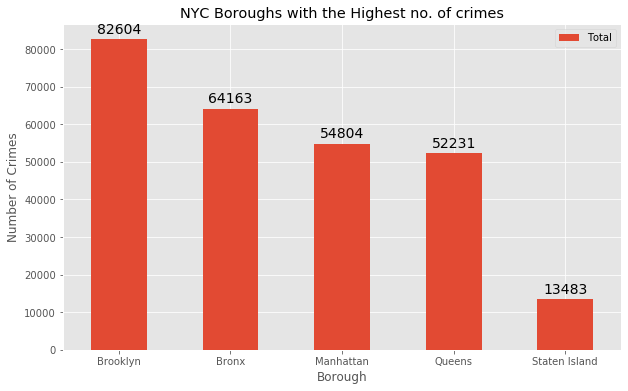

In [39]:
df_tt = df2[['Borough','Total']]

df_tt.set_index('Borough',inplace = True)

ax = df_tt.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('Number of Crimes') # add to x-label to the plot
ax.set_xlabel('Borough') # add y-label to the plot
ax.set_title('NYC Boroughs with the Highest no. of crimes') # add title to the plot

# Creating a function to display the percentage.

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )

plt.show()

From the above graph, it is clear that 'Staten Island' has least no of crimes.

##### Visualizing different types of crimes in the borough 'Staten Island'

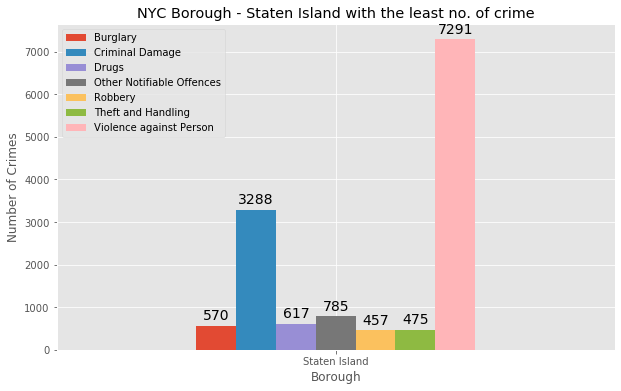

In [40]:
df_bc1 =  df2[df2['Borough'] == 'Staten Island']

df_bc = df_bc1[['Borough','Burglary','Criminal Damage','Drugs','Other Notifiable Offences',
                 'Robbery','Theft and Handling','Violence against Person']]


df_bc.set_index('Borough',inplace = True)

ax = df_bc.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('Number of Crimes') # add to x-label to the plot
ax.set_xlabel('Borough') # add y-label to the plot
ax.set_title('NYC Borough - Staten Island with the least no. of crime') # add title to the plot

# Creating a function to display the percentage.

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )

plt.show()

We can conclude that Staten Island is the safest borough when compared to the other boroughs in New York City.

#### Part 3: Creating a new dataset of the Neighbourhoods of the safest borough in New york City and generating their co-ordinates. 

The list of Neighbourhoods in the New York city  was found on a previous lab session of coursera. So, accessing the same dataset to get job done.

The data can aslo available on web: https://geo.nyu.edu/catalog/nyu_2451_34572

In [41]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


Next, let's load the data.

In [42]:
import json
from pandas.io.json import json_normalize
with open('newyork_data.json') as json_data:
    nyc_data = json.load(json_data)

Let's take a quick look at the data.

In [43]:
nyc_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

Notice how all the relevant data is in the *features* key, which is basically a list of the neighborhoods. So, let's define a new variable that includes this data.<br>
Let's take a look at the first item in this list.

In [44]:
neigh_data = nyc_data['features']
neigh_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

The next task is essentially transforming this data of nested Python dictionaries into a *pandas* dataframe. So let's start by creating an empty dataframe.

In [45]:
# define the dataframe columns
column_names = ['Borough', 'Neighbourhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neigh = pd.DataFrame(columns=column_names)

neigh

,Borough,Neighbourhood,Latitude,Longitude


Then let's loop through the data and fill the dataframe one row at a time.

In [46]:
for data in neigh_data:
    borough = neighbourhood_name = data['properties']['borough'] 
    neigh_name = data['properties']['name']
        
    neigh_latlon = data['geometry']['coordinates']
    neigh_lat = neigh_latlon[1]
    neigh_lon = neigh_latlon[0]
    
    neigh = neigh.append({'Borough': borough,
                                          'Neighbourhood': neigh_name,
                                          'Latitude': neigh_lat,
                                          'Longitude': neigh_lon}, ignore_index=True)
neigh

,Borough,Neighbourhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585
...,...,...,...,...
301,Manhattan,Hudson Yards,40.756658,-74.000111
302,Queens,Hammels,40.587338,-73.805530
303,Queens,Bayswater,40.611322,-73.765968
304,Queens,Queensbridge,40.756091,-73.945631


In [47]:
print('The dataframe has {} boroughs and {} neighbourhoods.'.format(
        len(neigh['Borough'].unique()),
        neigh.shape[0]))

The dataframe has 5 boroughs and 306 neighbourhoods.


In [48]:
neigh['Borough'].value_counts()

Queens           81
Brooklyn         70
Staten Island    63
Bronx            52
Manhattan        40
Name: Borough, dtype: int64

In [49]:
print(neigh['Borough'].value_counts())
N=neigh[neigh['Borough']=='Staten Island']
print(N.shape)
N.head()

Queens           81
Brooklyn         70
Staten Island    63
Bronx            52
Manhattan        40
Name: Borough, dtype: int64
(63, 4)


,Borough,Neighbourhood,Latitude,Longitude
197,Staten Island,St. George,40.644982,-74.079353
198,Staten Island,New Brighton,40.640615,-74.087017
199,Staten Island,Stapleton,40.626928,-74.077902
200,Staten Island,Rosebank,40.615305,-74.069805
201,Staten Island,West Brighton,40.631879,-74.107182


In [50]:
N=N.reset_index(drop=True)
N

,Borough,Neighbourhood,Latitude,Longitude
0,Staten Island,St. George,40.644982,-74.079353
1,Staten Island,New Brighton,40.640615,-74.087017
2,Staten Island,Stapleton,40.626928,-74.077902
3,Staten Island,Rosebank,40.615305,-74.069805
4,Staten Island,West Brighton,40.631879,-74.107182
...,...,...,...,...
58,Staten Island,Egbertville,40.579119,-74.127272
59,Staten Island,Prince's Bay,40.526264,-74.201526
60,Staten Island,Lighthouse Hill,40.576506,-74.137927
61,Staten Island,Richmond Valley,40.519541,-74.229571


##### Use geopy library to get the latitude and longitude values of New York City.

In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent <em>ny_explorer</em>, as shown below.

In [51]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


##### Create a map of New York with neighborhoods superimposed on top.

In [ ]:
import folium
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighbourhood in zip(neigh['Latitude'], neigh['Longitude'], neigh['Borough'], neigh['Neighbourhood']):
    label = '{}, {}'.format(neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

However, for illustration purposes, let's simplify the above map and segment and cluster only the neighbourhoods in Staten Island. So let's slice the original dataframe and create a new dataframe of the Staten Island data.

In [ ]:
staten_data = neigh[neigh['Borough'] == 'Staten Island'].reset_index(drop=True)
staten_data.head()

Let's get the geographical coordinates of Manhattan.

In [ ]:
address = 'Staten Island, NY'

geolocator = Nominatim(user_agent="nyc_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Staten Island are {}, {}.'.format(latitude, longitude))

As we did with all of New York City, let's visualize Staten Island and the neighbourhoods in it.

In [ ]:
# create map of Staten Island using latitude and longitude values
map_staten = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(staten_data['Latitude'], staten_data['Longitude'], staten_data['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_staten)  
    
map_staten

## 3.2 Modelling 
● Finding all the venues within a 500 meter radius of each neighbourhood.<br>
● Perform One hot encoding on the venues data.<br>
● Grouping the venues by the neighbourhood and calculating their mean.<br>
● Performing a K-means clustering (Defining K = 3)

Next, we are going to start utilizing the Foursquare API to explore the neighborhoods and segment them.

##### Define Foursquare Credentials and Version

In [ ]:
CLIENT_ID = 'RKWNHBB2OSI1CMY2BWSXEABHFU3MXM0FF1XYW2OVHUCAMDIS' # your Foursquare ID
CLIENT_SECRET = 'UOL25YIVDJNDZLNXHYBYE21ROIF2ZPEDPMQU20G3FOA3QE0X' # your Foursquare Secret
VERSION = '20200610' # Foursquare API version

print('My credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

##### Let's explore the first neighbourhood in our dataframe.
Get the neighbourhood's name

In [ ]:
staten_data.loc[0, 'Neighbourhood']

In [ ]:
neighbourhood_latitude = staten_data.loc[0, 'Latitude'] # neighborhood latitude value
neighbourhood_longitude = staten_data.loc[0, 'Longitude'] # neighborhood longitude value

neighbourhood_name = staten_data.loc[0, 'Neighbourhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighbourhood_name, 
                                                               neighbourhood_latitude, 
                                                               neighbourhood_longitude))

First, let's create the GET request URL. Name your URL **url**.

In [ ]:
url = 'https://api.foursquare.com/v2/venues/explore?client_id=RKWNHBB2OSI1CMY2BWSXEABHFU3MXM0FF1XYW2OVHUCAMDIS&client_secret=UOL25YIVDJNDZLNXHYBYE21ROIF2ZPEDPMQU20G3FOA3QE0X&ll=40.87655077879964,-73.91065965862981&v=20200601&radius=500&limit=100'

url

In [ ]:
results = requests.get(url).json()
results

From the Foursquare lab in the previous module, we know that all the information is in the *items* key. Before we proceed, let's borrow the **get_category_type** function from the Foursquare lab.

In [ ]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Now we are ready to clean the json and structure it into a *pandas* dataframe.

In [ ]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]
print(nearby_venues.shape)
nearby_venues.head()

In [ ]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

##### Let's create a function to repeat the same process to all the neighborhoods in Staten Island

In [ ]:
LIMIT=100
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Now write the code to run the above function on each neighborhood and create a new dataframe called *staten Island_venues*.

In [ ]:
staten_venues = getNearbyVenues(names=staten_data['Neighbourhood'],
                                   latitudes=staten_data['Latitude'],
                                   longitudes=staten_data['Longitude']
                               )
len(staten_venues)

In [ ]:
print(staten_venues.shape)
staten_venues.head()

In [ ]:
staten_venues.groupby('Neighbourhood').count()

Lets see the data in venue category wise

In [ ]:
staten_venues.groupby('Venue Category').count()['Neighbourhood'].sort_values(ascending=False).head(10)

In [ ]:
print("Total number of unique categories in Staten Island are : ",len(staten_venues['Venue Category'].unique()))

### Analyze Each Neighborhood

Analyse each neighbourhood by using *One Hot Encoding*

In [ ]:
staten_onehot = pd.get_dummies(staten_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
staten_onehot['Neighbourhood'] = staten_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [staten_onehot.columns[-1]] + list(staten_onehot.columns[:-1])
staten_onehot = staten_onehot[fixed_columns]

staten_onehot.head()

In [ ]:
staten_onehot.shape

In [ ]:
staten_grouped = staten_onehot.groupby('Neighbourhood').mean().reset_index()
staten_grouped

In [ ]:
staten_grouped.shape

##### Let's print each neighbourhood along with the top 5 most common venues

In [ ]:
num_top_venues = 5

for hood in staten_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = staten_grouped[staten_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

First, let's write a function to sort the venues in descending order.

In [ ]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [ ]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = staten_grouped['Neighbourhood']

for ind in np.arange(staten_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(staten_grouped.iloc[ind, :], num_top_venues)

print(neighbourhoods_venues_sorted.shape)
neighbourhoods_venues_sorted.head()

##### Elbow Method:
Before using K-Means Clustering, we need to find the optimal value of K in order to get efficient clusters. So, lets find the optimal K value using Elbow method.

In [ ]:
from sklearn.cluster import KMeans
sse = {}
for k in range(1,10):
    kmeans = KMeans(n_clusters=k,random_state=0)
    kmeans.fit(staten_grouped.drop('Neighbourhood',axis=1))
    staten_grouped['Cluster'] = kmeans.labels_
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

From the above graph, we came to know that k(Number of clusters) = 3 is the optimal value.

### Cluster Neighborhoods
Run *k*-means to cluster the neighborhood into 3 clusters.

In [ ]:
# set number of clusters
kclusters = 3

staten_grouped_clustering = staten_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(staten_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighbourhood.

In [ ]:
# add clustering labels
neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

staten_merged = staten_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
staten_merged = staten_merged.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

staten_merged.head() # check the last columns!

In [ ]:
neighbourhoods_venues_sorted.head()

In [ ]:
staten_merged['Cluster Labels'].dtype

In [ ]:
staten_merged['Cluster Labels']=staten_merged['Cluster Labels'].fillna(0).astype(int)
staten_merged['Cluster Labels'].dtype

Finally, let's visualize the resulting clusters

In [ ]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(staten_merged['Latitude'], staten_merged['Longitude'], staten_merged['Neighbourhood'], staten_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examine Clusters
Now, you can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, you can then assign a name to each cluster. I will leave this exercise to you.

#### Cluster 1

In [ ]:
staten_merged.loc[staten_merged['Cluster Labels'] == 0, staten_merged.columns[[1] + list(range(5, staten_merged.shape[1]))]]

The cluster one is the biggest cluster with most of the neighbourhoods in the borough Staten Island. Upon closely examining these neighbourhoods, we can see that the most common venues in these neighbourhoods are Restaurants, Pizza places, Cafe, Supermarkets, and stores etc.

#### Cluster 2

In [ ]:
staten_merged.loc[staten_merged['Cluster Labels'] == 1, staten_merged.columns[[1] + list(range(5, staten_merged.shape[1]))]]

The second cluster has some neighborhoods which consists of venues such as Bus stops, Deli/Bodega, and Restaurants.

#### Cluster 3

In [ ]:
staten_merged.loc[staten_merged['Cluster Labels'] == 2, staten_merged.columns[[1] + list(range(5, staten_merged.shape[1]))]]

The third cluster has only three neighborhoods which consists of venues such as Dog Run, Park, and Convenience store

## 4. Results and Discussion 
The aim of this project is to help people who want to relocate to the safest borough in New York City, expats can chose the neighbourhoods to which they want to relocate based on the most common venues in it. For example if a person is looking for a neighbourhood with good connectivity and public transportation we can see that Clusters 2 have Train stations and Bus stops as the most common venues. If a person is looking for a neighbourhood with stores and restaurants in a close proximity then the neighbourhoods in the first cluster is suitable. For a person who enjoys nature, I feel that the neighbourhoods in Cluster 3 are more suitable dues to the common venues in that cluster, these neighbourhoods have common venues such as Dog Run, Park, and Convenience store. Cluster 1 being biggest cluster with most number of neighbourhoods and variety of venues in each neighbourhood, is ideal for any kind of person. The choices of neighbourhoods may vary from person to person.

### 5. Conclusion 
This project helps a person get a better understanding of the neighbourhoods with respect to the most common venues in that neighbourhood. It is always helpful to make use of technology to stay one step ahead i.e. finding out more about places before moving into a neighbourhood. We have just taken safety as a primary concern to shortlist the borough of New York City. The future of this project includes taking other factors such as cost of living in the areas into consideration to shortlist the borough based on safety and a predefined budget.